In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meyungs
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | haines junction
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | shuangcheng
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | mumbwa
Processing Record 14 of Set 1 | dengzhou
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | sola
Processing Record 20 of Set 1 | okha
Processing Recor

Processing Record 35 of Set 4 | krasnoselkup
Processing Record 36 of Set 4 | nome
Processing Record 37 of Set 4 | bonavista
Processing Record 38 of Set 4 | vestmannaeyjar
Processing Record 39 of Set 4 | mahajanga
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | jaciara
Processing Record 42 of Set 4 | vao
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | boa vista
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | oranjemund
Processing Record 47 of Set 4 | santa fe
Processing Record 48 of Set 4 | qui nhon
Processing Record 49 of Set 4 | dryden
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | lake city
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | vershino-darasunskiy
Processing Record 5 of Set 5 | dongsheng
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing R

Processing Record 25 of Set 8 | menongue
Processing Record 26 of Set 8 | penzance
Processing Record 27 of Set 8 | taunggyi
Processing Record 28 of Set 8 | maragogi
Processing Record 29 of Set 8 | chapais
Processing Record 30 of Set 8 | gardabani
Processing Record 31 of Set 8 | caluquembe
Processing Record 32 of Set 8 | svetlaya
Processing Record 33 of Set 8 | victoria
Processing Record 34 of Set 8 | jabiru
City not found. Skipping...
Processing Record 35 of Set 8 | tazmalt
Processing Record 36 of Set 8 | tibati
Processing Record 37 of Set 8 | gympie
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | koboldo
City not found. Skipping...
Processing Record 40 of Set 8 | lexington
Processing Record 41 of Set 8 | simpang
Processing Record 42 of Set 8 | irtyshskiy
Processing Record 43 of Set 8 | marzuq
Processing Record 44 of Set 8 | nevelsk
Processing Record 45 of Set 8 | siilinjarvi
Processing Record 46 of Set 8 | tura
Processing Record 47 of Set 8 | east london
Proces

Processing Record 11 of Set 12 | kandi
Processing Record 12 of Set 12 | zhigansk
Processing Record 13 of Set 12 | porangatu
Processing Record 14 of Set 12 | ciudad guayana
Processing Record 15 of Set 12 | ormara
Processing Record 16 of Set 12 | pozhva
Processing Record 17 of Set 12 | noumea
Processing Record 18 of Set 12 | ciudad del maiz
Processing Record 19 of Set 12 | shache
Processing Record 20 of Set 12 | trelew
Processing Record 21 of Set 12 | novo aripuana
Processing Record 22 of Set 12 | kingman
Processing Record 23 of Set 12 | honiara
Processing Record 24 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 25 of Set 12 | berdigestyakh
Processing Record 26 of Set 12 | lazaro cardenas
Processing Record 27 of Set 12 | letlhakane
Processing Record 28 of Set 12 | price
Processing Record 29 of Set 12 | hamilton
Processing Record 30 of Set 12 | sapao
City not found. Skipping...
Processing Record 31 of Set 12 | susanino
Processing Record 32 of Set 12 | hambant

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
new_column_order = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
new_column_order= city_data_df
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.79,74,4,1.50,PF,2021-03-04 19:47:54
1,Castro,-24.7911,-50.0119,70.54,87,89,8.81,BR,2021-03-04 19:51:34
2,Haines Junction,60.7522,-137.5108,19.40,63,100,4.61,CA,2021-03-04 19:51:34
3,Dingle,10.9995,122.6711,74.62,91,24,7.74,PH,2021-03-04 19:51:34
4,Busselton,-33.6500,115.3333,66.00,98,81,7.29,AU,2021-03-04 19:51:34
...,...,...,...,...,...,...,...,...,...
568,Shouguang,36.8800,118.7375,55.99,64,95,1.01,CN,2021-03-04 19:53:50
569,Mendi,-6.1761,143.6513,54.88,96,100,2.95,PG,2021-03-04 19:53:50
570,Poso,-1.3959,120.7524,78.01,79,100,3.62,ID,2021-03-04 19:53:51
571,Mugumu,-1.8500,34.7000,62.78,93,96,2.68,TZ,2021-03-04 19:53:51


In [13]:
# Export the City_Data into a CSV.
city_data_df.to_csv("output_data_file.csv", index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

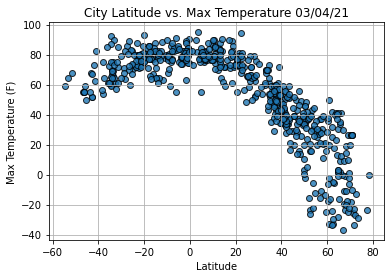

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

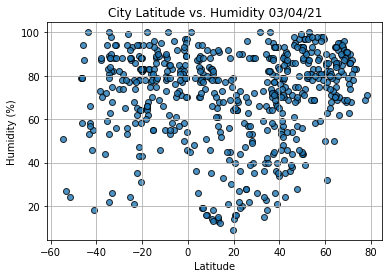

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

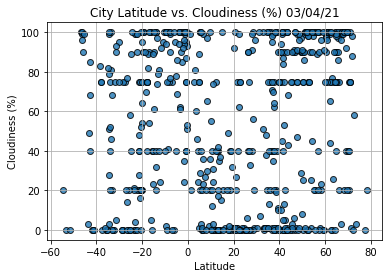

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

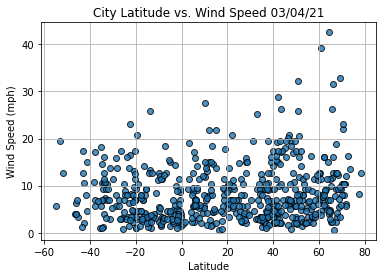

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()